In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

In [3]:
TS_CSV = './623_xalancbmk_s_ts.csv'
CONFIG_CSV='./623_xalancbmk_s_regret_out.csv'

In [4]:
df = pd.read_csv(TS_CSV)
df.head()


,Timestamp,run_warm_up,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,...,run_43,run_44,run_45,run_46,run_47,run_48,run_49,run_50,run_default_jemalloc,run_default_tcmalloc
0,0,0.003277,0.005950,0.003300,0.004552,0.006424,0.009642,0.008056,0.008202,0.003484,...,0.005869,0.011226,0.003342,0.003319,0.003280,0.003345,0.007472,0.003377,0.003192,0.006184
1,1,0.270060,0.274193,0.255486,0.255496,0.279651,0.309032,0.314054,0.269421,0.267880,...,0.294967,0.321526,0.202580,0.195471,0.255892,0.269609,0.283764,0.195669,0.267997,0.295707
2,2,0.223214,0.223107,0.208692,0.207223,0.231831,0.251236,0.225359,0.219911,0.218721,...,0.239219,0.229771,0.215966,0.209520,0.209520,0.224016,0.231818,0.210259,0.220489,0.226189
3,3,0.338481,0.347990,0.319608,0.316335,0.358139,0.395235,0.346839,0.347679,0.333018,...,0.369436,0.231432,0.333611,0.324589,0.321805,0.340298,0.362707,0.325559,0.336723,0.227854
4,4,0.384659,0.396598,0.369387,0.363570,0.407603,0.445264,0.399086,0.397143,0.379516,...,0.422770,0.399693,0.381271,0.370130,0.370312,0.387024,0.411100,0.374069,0.386080,0.384444


In [5]:
configs = pd.read_csv(CONFIG_CSV)
configs.head()

,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_mutex_max_spin,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_thp,je_trust_madvise,rss
0,True,17800,primary,22,18,52,always,465,34556,583,29093231,disabled,True,default,True,-0.652425
1,False,48327,primary,11,10,30,disabled,1837,23090,186,5489436,percpu,False,never,False,-3.362668
2,False,11367,disabled,18,2,3,auto,1317,7244,42,10049339,phycpu,True,default,False,-1.886284
3,True,29389,secondary,7,26,78,always,1183,44485,443,24213832,disabled,False,never,True,2.998388
4,True,3280,primary,3,29,42,auto,1732,1488,317,13340381,percpu,True,always,True,8.066844


In [6]:
configs.nsmallest(5, 'rss')

,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_mutex_max_spin,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_thp,je_trust_madvise,rss
45,False,40899,disabled,11,16,32,disabled,1837,23090,2,351234,phycpu,True,never,True,-4.686413
46,False,44798,disabled,13,16,32,disabled,1525,23090,2,241131,disabled,False,never,False,-3.789556
39,False,44846,disabled,11,9,33,disabled,1830,23090,1,797263,percpu,True,never,False,-3.432215
40,False,48327,secondary,13,16,31,disabled,1837,23090,2,1257306,phycpu,True,default,False,-3.371039
1,False,48327,primary,11,10,30,disabled,1837,23090,186,5489436,percpu,False,never,False,-3.362668


In [7]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i}' in df.columns]
selected_columns

['run_46', 'run_47', 'run_40']

In [8]:
custom_df = pd.read_csv('./623_xalancbmk_s_custom_ts.csv')
sampled_elements = custom_df['run_custom_jemalloc']
sampled_elements = np.array(sampled_elements)
len(sampled_elements)

112

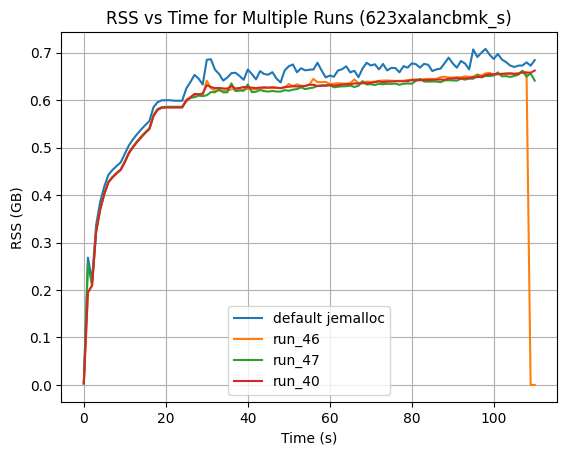

In [9]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(TS_CSV)
graph_name = TS_CSV.replace('_ts.csv', '').replace('_', '', 1)[2:]

# Extract timestamps and RSS values for each run
timestamps = df['Timestamp']
warmup = df['run_warm_up']
default = df['run_default_jemalloc']
tc_default = df['run_default_tcmalloc']

#plt.plot(timestamps, warmup, label='warm_up')
plt.plot(timestamps, default, label='default jemalloc')
#plt.plot(timestamps, tc_default, label='default tcmalloc')
for column in selected_columns:  # Skip 'Timestamp'
    plt.plot(timestamps, df[column], label=column)

# Customize plot
plt.xlabel('Time (s)')
plt.ylabel('RSS (GB)')
plt.title(f'RSS vs Time for Multiple Runs ({graph_name})')
plt.legend()
plt.grid(True)

# Display plot
plt.show()


In [10]:
default_conf_dict = {'je_cache_oblivious': True, 'je_metadata_thp': 'disabled', 'je_trust_madvise': False, 'je_retain': True, 'je_dss': 'secondary', 'je_narenas': 160, 'je_oversize_threshold': 8388608, 'je_background_thread': False, 'je_max_background_threads': 40, 'je_dirty_decay_ms': 10000, 'je_muzzy_decay_ms': 10000, 'je_lg_extent_max_active_fit': 6, 'je_tcache': True, 'je_lg_tcache_max': 15, 'je_thp': 'default', 'je_percpu_arena': 'default', 'je_mutex_max_spin': '1600', "je_background_thread": "false"}
default_conf_dict = dict(sorted(default_conf_dict.items()))
default_conf_dict.update({'rss': 0})
default_conf_df = pd.DataFrame([default_conf_dict])
default_conf_df

smallest_configs = configs.nsmallest(3, 'rss').copy()

# Add an identifier column to distinguish these configurations clearly
smallest_configs['config'] = selected_columns

# Add identifier to default configuration
default_conf_df['config'] = 'default'

# Concatenate vertically to compare clearly
comparison_df = pd.concat([smallest_configs, default_conf_df], ignore_index=True)

# Move 'config' column to the front and 'rss' column to the end for readability
cols = ['config'] + [col for col in comparison_df.columns if col not in ['config', 'rss']] + ['rss']
comparison_df = comparison_df[cols]

comparison_df.T

,0,1,2,3
config,run_46,run_47,run_40,default
je_cache_oblivious,False,False,False,True
je_dirty_decay_ms,40899,44798,44846,10000
je_dss,disabled,disabled,disabled,secondary
je_lg_extent_max_active_fit,11,13,11,6
je_lg_tcache_max,16,16,9,15
je_max_background_threads,32,32,33,40
je_metadata_thp,disabled,disabled,disabled,disabled
je_mutex_max_spin,1837,1525,1830,1600
je_muzzy_decay_ms,23090,23090,23090,10000


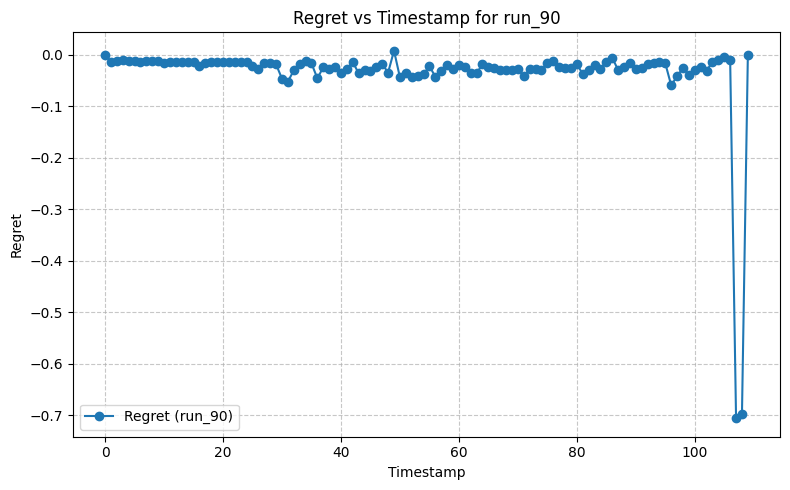

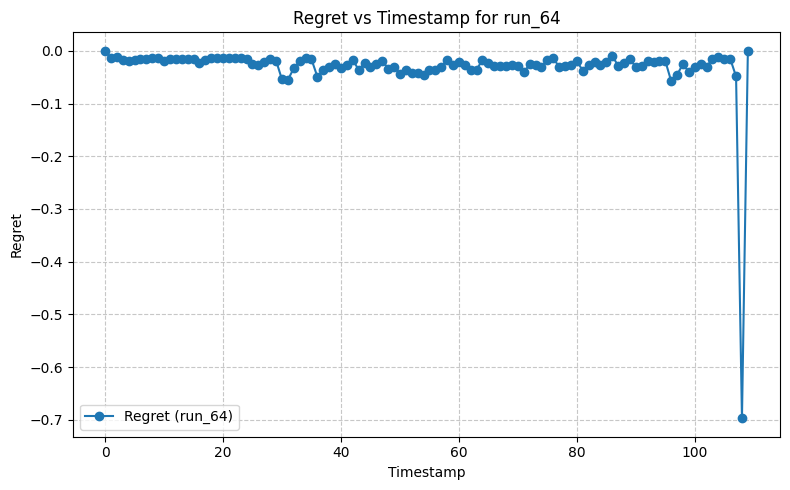

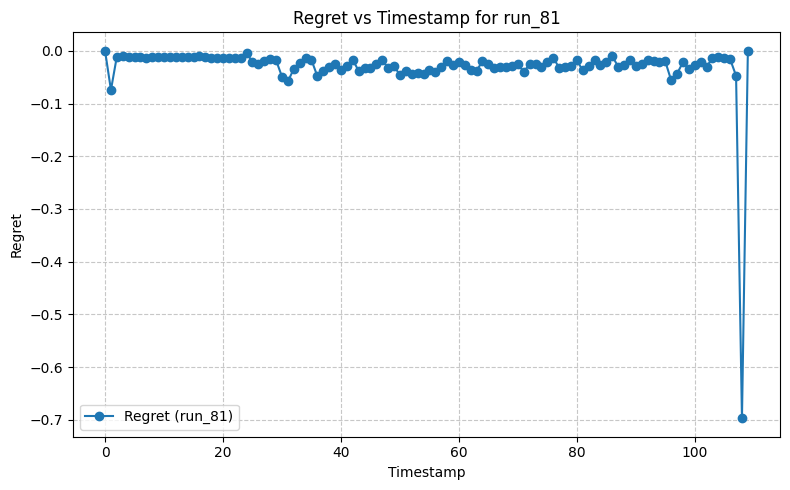

In [9]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i+1}' in df.columns]

# Step 3: Generate separate plots for each selected column
for column in selected_columns:
    # Calculate regret for the current column
    regret =  (df[column] - df['run_default_jemalloc'])
    
    # Create a new plot for this column
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot the regret against the index
    ax.plot(regret.index, regret.values, marker='o', label=f'Regret ({column})')
    
    # Customize the plot
    ax.set_title(f'Regret vs Timestamp for {column}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Regret')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [3]:
TIMESERIES_FILE = './538_imagick_r_timeseries.csv'
csvfile = pd.read_csv(TIMESERIES_FILE)
timestamps = csvfile['Timestamp']
rss_values = csvfile['RSS'] / (1024*1024)

# Plotting the RSS values over time
plt.plot(timestamps, rss_values, label='RSS over Time', marker='o')
plt.xlabel('Time (s)')  # X-axis label
plt.ylabel('RSS (MB)')  # Y-axis label
plt.title('RSS vs Time')  # Title of the plot
plt.legend()  # Display the legend
plt.grid(True)  # Add a grid for better readability

# Display the plot in the notebook
plt.show()


EmptyDataError: No columns to parse from file